# Machine-Learning tutorial for classification

## Objective

## Dataset

## Preprocessing

## Model 

## Cross-validation



# Let's begin! 
### First we import some useful python libraries...

In [2]:
## Imports
from nilearn import datasets
from nilearn.connectome import ConnectivityMeasure
import pandas as pd
import numpy as np
import seaborn as sns

/Users/nikhil/projects/SDC-BIDS-sMRI/SDC_sMRI_workshop_2021/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## Download data

In [3]:
n_subjects = 100
parcel = 'rois_ho' # 'rois_ho' or 'rois_aal
data = datasets.fetch_abide_pcp(n_subjects=n_subjects,derivatives=[parcel])

/Users/nikhil/projects/SDC-BIDS-sMRI/SDC_sMRI_workshop_2021/lib/python3.8/site-packages/numpy/lib/npyio.py:2405: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)
 ...done. (2 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (0 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (1 seconds, 0 min)
 ...done. (1 seconds, 0

## Phenotypes and Demographics

In [4]:
pheno = pd.DataFrame(data['phenotypic']).drop(columns=['i','Unnamed_0'])
pheno.head()

SUB_ID  X  subject  SITE_ID          FILE_ID  DX_GROUP  DSM_IV_TR  \
0   50003  2    50003  b'PITT'  b'Pitt_0050003'         1          1   
1   50004  3    50004  b'PITT'  b'Pitt_0050004'         1          1   
2   50005  4    50005  b'PITT'  b'Pitt_0050005'         1          1   
3   50006  5    50006  b'PITT'  b'Pitt_0050006'         1          1   
4   50007  6    50007  b'PITT'  b'Pitt_0050007'         1          1   

   AGE_AT_SCAN  SEX HANDEDNESS_CATEGORY  ...  qc_notes_rater_1  \
0        24.45    1                b'R'  ...               b''   
1        19.09    1                b'R'  ...               b''   
2        13.73    2                b'R'  ...               b''   
3        13.37    1                b'L'  ...               b''   
4        17.78    1                b'R'  ...               b''   

   qc_anat_rater_2  qc_anat_notes_rater_2  qc_func_rater_2  \
0            b'OK'                    b''            b'OK'   
1            b'OK'                    b''            b'OK'   
2            b'OK'                    b''         b'maybe'   
3            b'OK'                    b''         b'maybe'   
4            b'OK'                    b''         b'maybe'   

           qc_func_notes_rater_2 qc_anat_rater_3 qc_anat_notes_rater_3  \
0                            b''           b'OK'                   b''   
1                            b''           b'OK'                   b''   
2      b'ic-parietal-cerebellum'           b'OK'                   b''   
3          b'ic-parietal slight'           b'OK'                   b''   
4  b'ic-cerebellum_temporal_lob'           b'OK'                   b''   

   qc_func_rater_3  qc_func_notes_rater_3  SUB_IN_SMP  
0            b'OK'                    b''           1  
1            b'OK'                    b''           1  
2            b'OK'                    b''           0  
3            b'OK'                    b''           1  
4            b'OK'                    b''           1  

[5 rows x 104 columns]

In [5]:
site_counts = pheno['SITE_ID'].value_counts()
dx_counts = pheno['DX_GROUP'].value_counts()

print(f'Dx count:\n{dx_counts}\n\nScanning site_counts:\n{site_counts}')

Dx count:
1    50
2    50
Name: DX_GROUP, dtype: int64

Scanning site_counts:
b'PITT'    50
b'OLIN'    28
b'OHSU'    22
Name: SITE_ID, dtype: int64


## MRI features

### These are stored in a list, where each list element is a subject-specific feature matrix
### Subject specific feature matrix: timepoints x ROIs
### ROIs are defined based on [harvard_oxford atlas](https://nilearn.github.io/modules/generated/nilearn.datasets.fetch_atlas_harvard_oxford.html) or [AAL atlas](https://nilearn.github.io/modules/generated/nilearn.datasets.fetch_atlas_aal.html)

In [7]:
features = data[parcel]

print(f'Number of samples: {len(features)}')

subject_feature_shape = features[0].shape

print(f'subject_feature_shape: {subject_feature_shape}')

Number of samples: 100
subject_feature_shape: (196, 111)


## Let's see how the atlas looks like


Dataset created in /Users/nikhil/nilearn_data/fsl

Downloaded 25526272 of 25716861 bytes (99.3%,    0.2s remaining) ...done. (25 seconds, 0 min)
Extracting data from /Users/nikhil/nilearn_data/fsl/245b1ae3f43e3ea47e2ed9f438694f4a/HarvardOxford.tgz..... done.


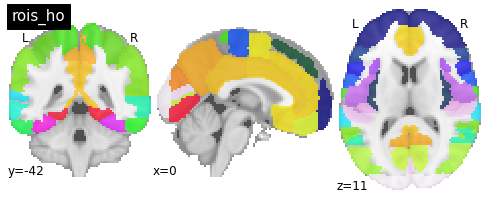

In [9]:
from nilearn import plotting
if parcel == 'rois_ho':
    atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
else:
    atlas = datasets.fetch_atlas_aal()

plotting.plot_roi(atlas.maps, draw_cross=False, title=parcel)

## And the subject-specific feature matrix

Text(0.5, 1.0, 'Functional data timeseries')

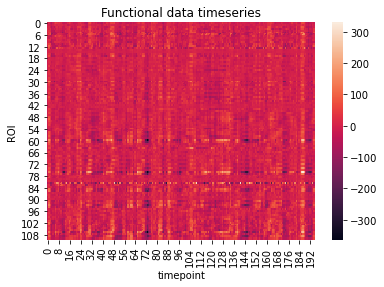

In [10]:
g = sns.heatmap(features[0].T)
g.set_xlabel('timepoint')
g.set_ylabel('ROI')
g.set_title('Functional data timeseries')

## Preprocessing / feature engineering

### Commonly functional (timeseries) neuroimaging data is represented as functional connectome aka network ake graph. 

Shape connectome: (111, 111)


Text(0.5, 1.0, 'Connectome')

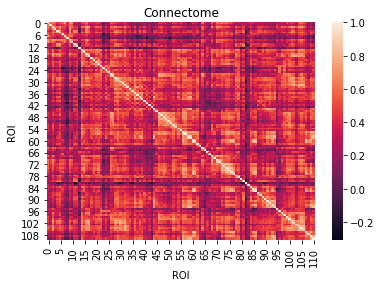

In [12]:
connectome_matrix = ConnectivityMeasure(kind='correlation')
connectome_matrix = connectome_matrix.fit_transform([features[0]])[0]
print(f'Shape connectome: {connectome_matrix.shape}')

g = sns.heatmap(connectome_matrix)
g.set_xlabel('ROI')
g.set_ylabel('ROI')
g.set_title('Connectome')

In [15]:
# Extract lower (or upper) triangle entrees (excluding diagonal)
tril_idx = np.tril_indices(len(connectome_matrix),k=1) 
features_flat = connectome_matrix[tril_idx]
print(f'Number of features per subject: {len(features_flat)}')

Number of features per subject: 6326


## Now do this for all subjects!

In [17]:
# defs are definitely useful! 

def extract_connectome_features(func_data, measure):
    connectome_matrix = measure.fit_transform([features[0]])[0]
    tril_idx = np.tril_indices(len(connectome_matrix),k=1) 
    flat_features = connectome_matrix[tril_idx]

    return flat_features


In [18]:
correlation_measure = ConnectivityMeasure(kind='correlation')

flat_features_list = []
for func_data in features:
    flat_features = extract_connectome_features(func_data, correlation_measure)
    flat_features_list.append(flat_features)

print(f'Length of flat_features_list {len(flat_features_list)}')

Length of flat_features_list 100


In [25]:
X = np.array(flat_features_list)

print(f'Input data (X) shape: {X.shape}')

# Memory intensive #

# g = sns.heatmap(flat_features_array)
# g.set_xlabel('Connection strength')
# g.set_ylabel('ROI')
# g.set_title('Connectome')

Input data (X) shape: (100, 6326)


## Output labels (y): Diagnosis


In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y = pheno['DX_GROUP']
y = le.fit_transform(y)


## Okay now we have our input data (X) and output data (y) in the following format
<img src="Imgs/SampFeat.png" alt="terms" width="300"/>

## Create train-test split
- 60/40 ratio
- Stratify with site? 

In [29]:
from sklearn.model_selection import train_test_split
stratification = pheno['SITE_ID']

X_train, X_test, y_train, y_test = train_test_split(
                                                    X, # input features
                                                    y, # output labels
                                                    test_size = 0.4, # 60%/40% split  
                                                    shuffle = True, # shuffle dataset
                                                                    # before splitting
                                                    stratify = stratification, 
                                                    random_state = 123 # same shuffle each time
                                                    )

# print the size of our training and test groups
print('training:', len(X_train), 'testing:', len(X_test))

training: 60 testing: 40


## Okay finally, let's run your first model!

In [31]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)


In [32]:
y_pred = clf.predict(X_test)

y_pred_prob = clf.predict_proba(X_test)

clf.score(X_test, y_test)

0.425

In [33]:
clf.score(X_train, y_train)

0.55